# LSTM Based Poems Writing Style Recognition Analysis


---

> Kejing Huang, Qiubai Yu, Zi Yang



#1. Project Idea
Poetry (derived from the Greek poiesis, "making") is a form of literature that uses aesthetic and often rhythmic qualities of language − such as phonaesthetics, sound symbolism, and metre − to evoke meanings in addition to, or in place of, a prosaic ostensible meaning. Poetry has a long and varied history, evolving differentially across the globe. It dates back at least to prehistoric times with hunting poetry in Africa, and to panegyric and elegiac court poetry of the empires of the Nile, Niger, and Volta River valleys. Some of the earliest written poetry in Africa occurs among the Pyramid Texts written during the 25th century BCE. The earliest surviving Western Asian epic poetry, the Epic of Gilgamesh, was written in Sumerian.

Poetry is important because writing it lets us get out our feelings and thoughts on a subject while reading it encourages us to connect and find meaning in our experiences. Poetry can have a positive impact on social and emotional learning and it may offer people a new way of thinking about something. Every poet has a style. Part of the keys to becoming a well-known and respected poet is honing that style and creating something entirely unique to you and your life experience.

As students that love reading and writing poetry, and have seen what neural networks have been able to do with text classification, we want to test the boundaries of such a network. Our goal through this Deep Learning project is to see if a Long short-term memory (LSTM) network model can find and reveal the right poet given a part of a poem. More specifically, we train a model that can identify who writes a piece of work. We hope that our model can identify each poet's writing style. Furthermore, given enough data, we expect our model to be trained on the poems of a poet, and be able to classify later inputs as the given poet.


#2. Tools used


*   Python 3
*   Numpy
*   Keras
*   Tensorflow
*   Sklearn
*   PoemHunter




# 3. Prepare the data

For data generation, we used poems from Kaggle/Project Gutenberg (https://www.kaggle.com/nltkdata/gutenberg) and PoemHunter (https://www.poemhunter.com/), made all poems from the same poet into a text file, and uploaded all text files to the colab manually.  

We selected 11 poets:  
1. George Gordon Byron
2. Khalil Gibran
3. Johann Wolfgang von Goethe
4. Thomas Hardy
5. Seamus Heaney
6. Homer
7. Victor Hugo
8. Alexander Sergeyevich Pushkin
9. Percy Bysshe Shelley
10. Rabindranath Tagore
11. Voltaire

![](https://drive.google.com/uc?export=view&id=1tsgGcK9wmysSTtu8i6hYRYFgXqlqMlb9)
A screenshot of a text file containing poems written by George Gordon Byron is shown below:
![](https://drive.google.com/uc?export=view&id=1ywfb462SVLwa_IfZgqtyrUWUH6uViRI2)

#4. Preprocess the data
For data preprocessing, firstly install Natural Language Toolkit (NLTK) to help analysis, preprocess, and understand the written text, followed by importing necessary libraries and APIs such as tensorflow, numpy, keras, etc. Then for each poem, split paragraphs into sentences, remove punctuations and truncate the sentences. Finally convert words into numbers, create input data and labels, and generate training set (90% of the dataset) and testing set (10% of the dataset).

In [3]:
# Install Natural Language Toolkit (NLTK)
!pip install nltk

In [4]:
# Import Python, data and preprocessing libraries
# NN libraries
import tensorflow as tf
import numpy as np
import keras
# reading txt files
import os
# preprocessing tools
import string
import nltk

from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize

In [5]:
# Mount drive so the model can interact with drive files in the file browser side panel or using command-line utilities
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 4.1 Split into sentences and tokenize into words



In [6]:
nltk.download('punkt')

vocab = set()
poets = set()

raw_X = []
raw_Y = []
DIR = '/content/drive/MyDrive/Po8/'

for file_name in os.listdir(DIR):
  poet = file_name.rpartition('-')[0]
  poets.add(poet)
  if file_name.endswith('.txt'):
    fp = open(DIR + file_name, "r")
    data = fp.read()

    # split paragraphs into sentences
    sentences = sent_tokenize(data)

    words_list = []
    for sentence in sentences:
      # remove punctuations and split by whitespaces
      clean_words = ''.join(' ' if c in string.punctuation else c for c in sentence)
      words = clean_words.split()
      vocab = vocab.union(set(words))

      if len(words) >= 20:
        # truncate the sentence
        raw_X.append(words[:20])
        raw_Y.append(poet)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


After using the **nltk package** to parse sentences and truncating sentences into 20 words, a sample of the processed sentence is printed below:

In [7]:
print(' '.join(raw_X[256]))

The water in this pool keeps in its depth the memory of her swimming limbs and her wet feet had


###4.2 Convert vocabs and poets to numbers

In [8]:
word2id = {w: i for i, w in enumerate(list(vocab))}
poet2id = {p: i for i, p in enumerate(list(poets))}

###4.3 Generate input data and labels

In [9]:
assert(len(raw_X) == len(raw_Y))

inputs = []
labels = []

NUM_POETS = 11

for i in range(len(raw_X)):
  words = raw_X[i]
  input = []
  for word in words:
    input.append(word2id[word])
  # convert the inputs into np arrays
  inputs.append(np.array(input))
  # convert the labels into one-hot vectors
  one_h = np.zeros(NUM_POETS)
  one_h[poet2id[raw_Y[i]]-1] = 1
  labels.append(one_h)

###4.4 Split inputs and labels into training set and testing set

In [10]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.10, random_state=40)

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

#5. Build and test the Model
Build a Long Short-Term Memory (LSTM) neural network model with a softmax function appended to the final layer to convert the scores to a normalized probability distribution.

In [16]:
# Build LSTM model with a softmax function appended to the final layer
def model(bi_LSTM):
  NUM_POETS = 11
  VOCAB_SIZE = len(vocab)
  EMBEDDING_SIZE = 100
  RNN_SIZE = 100
  filters = 256
  kernel_size = 3

  model = keras.Sequential()
  model.add(keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_SIZE, input_length=20))
  model.add(keras.layers.SpatialDropout1D(0.2))
  if bi_LSTM:
    model.add(keras.layers.Conv1D(filters, kernel_size, activation='relu'))
    model.add(keras.layers.Bidirectional(keras.layers.LSTM(RNN_SIZE, dropout=0.2, recurrent_dropout=0.2)))
  else :
    model.add(keras.layers.LSTM(RNN_SIZE, dropout=0.1, recurrent_dropout=0.1))
  model.add(keras.layers.Dropout(0.2))
  model.add(keras.layers.Dense(NUM_POETS, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [18]:
# Train the model by fitting it to the training data
epochs = 10
batch_size = 64
bi_LSTM = model(True)
LSTM = model(False)
history1 = bi_LSTM.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)
history2 = LSTM.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)


In [19]:
# Test the bi directional LSTM model and calculate the training and testing accuracies
loss, accuracy = bi_LSTM.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy is {:.4f}".format(accuracy))
loss, accuracy = bi_LSTM.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy is {:.4f}".format(accuracy))

Training Accuracy is 0.9696
Testing Accuracy is 0.7725


In [20]:
# Test LSTM model and calculate the training and testing accuracies
loss, accuracy = LSTM.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy is {:.4f}".format(accuracy))
loss, accuracy = LSTM.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy is {:.4f}".format(accuracy))

Training Accuracy is 0.9567
Testing Accuracy is 0.7603


**Model summarization** includs:


*   The layers and their order in the model
*   The output shape of each layer
*   The number of parameters (weights) in each layer
*   The total number of parameters (weights) in the model

In [21]:
bi_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 100)           2069300   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 20, 100)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 18, 256)           77056     
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              285600    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 11)               

In [22]:
LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 100)           2069300   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 20, 100)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 11)                1111      
                                                                 
Total params: 2,150,811
Trainable params: 2,150,811
Non-trainable params: 0
____________________________________________

In [13]:
# Install plot_keras_history package to print keras training history
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8793 sha256=8cde1339fc3e5ad2ed0dae29140f0d8bceebcf27d1f73bf8432bff1cc64f4f99
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7877 sha256=2af8e10bcb5d2d4cf5869f3a2b182e147331d28eaf3b98c7c91be4c096f15efc
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4585 sha256=84c52cffa63fc47d8b324dc8406fa5719d05bc25ab1e5777f90e1d685e2e4640
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac269adc10>,
       dtype=object))

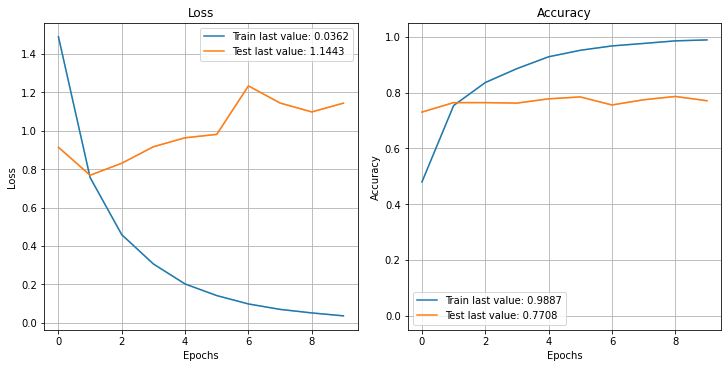

In [23]:
# Visualize the performance of the model over time during training
from plot_keras_history import plot_history
plot_history(history1)

(<Figure size 720x360 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac1e3489d0>,
       dtype=object))

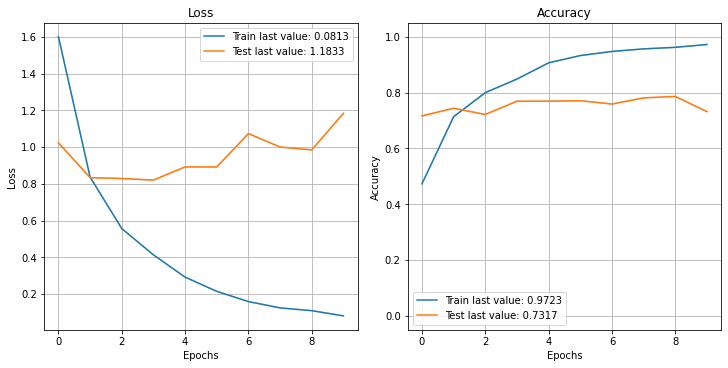

In [24]:
plot_history(history2)

#6. Analysis and conclusions
Our LSTM neural network model could achieve a training accuracy of around 0.95 and a testing accuracy of 0.75. Based on the history plot of our model’s accuracy, we seem to not be able to make further progress. The test accuracies stuck at ~ 0.75 from the very first epoch to the last epoch. We identify the bottleneck being our model architecture. Although our model can achieve some level of accuracy of identifying poets, thanks to LSTM being able to capture the meaning of the sentences well, there might be better architectures. Furthermore, there might be different and more efficient preprocessing approaches. The pre-processing changed several times during the project. At the beginning, we were thinking of simply converting the poems into 26x26 matrices, indicating the probabilities of letter x followed by letter y.  And we hoped that these 26x26 matrices are able to capture some level of nuances within writing styles / word usages of different poets. However, we later on realized that by breaking words into letters, we would lose the meanings of different words. This letter level preprocessing might impose an upper bound of the performance. The other preprocessing technique that we tried is to simply break down sentences into words and put a fixed size of words into one segment to form one data point. With this approach, we kept the word-level meanings of poems and also trimmed the size of our input data, which is easier for us to pass data into the neural network. However, the problem was that it’s possible to put an end of a sentence and a start of another sentence together.  We can’t really trust these data points even if the model could be good at classifying them. 

We ended up with our current approach where we used a Python natural language processing library NLTK. It tokenized the poems into sentences. We later on truncated these sentences and selected only the first 20 words. In this case, we still kept the word-level meaning as well as the sentence-level meaning (hopefully). There are some other approaches that even maintain the paragraph-level meanings. If we had time, we would try starting from here and construct the models. We wish that we could try out more model structures for example GRU, and more preprocessing approaches if we had more time.
